# Cell size homeostasis

Go to [Index](response_Witz2019_index.ipynb).

Figure 5 and its supplements suggest that the simulation of Witz and colleagues' model reproduces accurately the experimental cell-size homeostasis behavior. This observation is all the more puzzling because the application of the theoretical results using the experimental values of $\sigma_{ii}$ and $\sigma_{id}$ suggests a significant deviation from the adder principle (see below).

All simulation files used here were produced by executing the notebook [response_Witz2019_simulations](response_Witz2019_simulations.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, re, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'   # to export text as text, not curves
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('code')
from functions_response import plot_simulation_overlays, plot_adder_compare

In [3]:
# create/declare export directory for figures
fig_dir = os.path.join('figures')
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)
    
# create variables for the path to simulation files
## simulation files provided by Witz and al.
dir_simuWTZ = os.path.join('..','DataSimulations')
## simulation files produced for this response.
dir_simuGLTFS = 'simulations'
if not os.path.isdir(dir_simuWTZ):
    raise ValueError("Directory doesn't exist:", dir_simuWTZ)
if not os.path.isdir(dir_simuGLTFS):
    raise ValueError("Directory doesn't exist:", dir_simuGLTFS)
    
# select extensions for the figure output
ext_list = ['.png','.svg']

## Reproducing simulations provided by Witz et al.

Witz and colleagues kindly provided the scripts to reproduce their analysis, as well as files containing simulation results. In order to reproduce those results, we followed the instructions given in the *Materials and Methods*:
> [...] a series of 500 cells is initialized with all required parameters: initial length $L_0$ taken from the birth length  distribution, $\lambda = P(\lambda)$, number of origins $n_\text{ori}$, and the two adders $d\Lambda_{ib} = P(d\Lambda_{ib})$ and $d\Lambda_{if} = P(d\Lambda_{if})$ whose counters are starting at 0. The exact initialization is not crucial as the system relaxes to its equilibrium state after a few generations.

Let us denote the number of initial cells as $N$. It is also the number of independent lineages in the simulations since only one daughter cell is retained after each division event. As far as we can tell, using $N=500$ initial cells indeed reproduced very closely the simulation files provided. As will be seen in the analysis below, even the abnormal peak in the distribution of the division ratio is reproduced. This peak is caused by the $N$ initial cells having a division ratio set to exactly $1/2$, and which represent a significative proportion of the total cell population.


In [4]:
# Load the simulation files
## selection parameters
nice_colors = ['darkblue', 'darkgreen', 'darkred', 'brown', 'magenta']
names = ['glycerol','glucose','glucose8aa','glycerolauto']
simu_suffixes = ['N500T2000', 'N5T200000']
patrn = 'N(\d+)T(\d+)'
simu_type = 'standard'
simu_dict = {}

## loading loops
for name in names:
    print("Loading simulation results for condition: {:s}...".format(name))
    simu_dict[name] = {}
    sub_dict = simu_dict[name]
    
    fname = "{:s}_{:s}".format(name, simu_type)

    color_iter = iter(nice_colors)
    # load simulation file provided by Witz et al.
    fpath_WTZ = os.path.join(dir_simuWTZ, fname + '.pkl')
    color = next(color_iter)
    if os.path.isfile(fpath_WTZ):
        sub_dict[fpath_WTZ] = {}
        sub_dict[fpath_WTZ]['df'] = pd.read_pickle(fpath_WTZ)
        sub_dict[fpath_WTZ]['format']='SIM'
        sub_dict[fpath_WTZ]['label']='original'
        sub_dict[fpath_WTZ]['color'] = color
        

    for simu_suf in simu_suffixes:
        N,T = re.match(patrn, simu_suf).groups()
        N = int(N)
        T = int(T)
        fpath_GLTFS = os.path.join(dir_simuGLTFS, "{:s}_{:s}".format(fname, simu_suf) + '.pkl')
        color = next(color_iter)

        if os.path.isfile(fpath_GLTFS):
            sub_dict[fpath_GLTFS] = {}
            sub_dict[fpath_GLTFS]['df'] = pd.read_pickle(fpath_GLTFS)
            sub_dict[fpath_GLTFS]['color'] = color
            sub_dict[fpath_GLTFS]['format']='SIM'
            sub_dict[fpath_GLTFS]['label']='sim. w/ N = {:d}'.format(N)

Loading simulation results for condition: glycerol...
Loading simulation results for condition: glucose...
Loading simulation results for condition: glucose8aa...
Loading simulation results for condition: glycerolauto...


In [5]:
# make the plots and save them
## parameters
figname_base = 'simulations_comparison'
#binw_dict = {'rfact': 0.01}
binw_dict = None
outputdir = os.path.join(fig_dir, 'figure5_analysis','reproducing_original')

if not os.path.isdir(outputdir):
    os.makedirs(outputdir)

## loop
for i in range(len(names)):
    name = names[i]
    fig_title = name
    
    mydict = copy.deepcopy(simu_dict[name])
    
    # delete one simulation
    key = 'simulations/{:s}_standard_N5T200000.pkl'.format(name)
    del mydict[key]
    
    fig = plot_simulation_overlays(mydict, bar_width=0.5, fig_title=fig_title, binw_dict=binw_dict)

    figname = "{:s}_{:s}".format(figname_base,name)
    fpath = os.path.join(outputdir, "{:s}".format(figname))
    for ext in ext_list:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
    plt.close('all')

../DataSimulations/glycerol_standard.pkl
Cells with rfact = 0.5: 490 / 10857 <=> 4.51 %
simulations/glycerol_standard_N500T2000.pkl
Cells with rfact = 0.5: 490 / 10779 <=> 4.55 %
Saved figure in figures/figure5_analysis/reproducing_original/simulations_comparison_glycerol.png
Saved figure in figures/figure5_analysis/reproducing_original/simulations_comparison_glycerol.svg
../DataSimulations/glucose_standard.pkl
Cells with rfact = 0.5: 490 / 18426 <=> 2.66 %
simulations/glucose_standard_N500T2000.pkl
Cells with rfact = 0.5: 490 / 18426 <=> 2.66 %
Saved figure in figures/figure5_analysis/reproducing_original/simulations_comparison_glucose.png
Saved figure in figures/figure5_analysis/reproducing_original/simulations_comparison_glucose.svg
../DataSimulations/glucose8aa_standard.pkl
Cells with rfact = 0.5: 490 / 23862 <=> 2.05 %
simulations/glucose8aa_standard_N500T2000.pkl
Cells with rfact = 0.5: 490 / 23870 <=> 2.05 %
Saved figure in figures/figure5_analysis/reproducing_original/simulatio

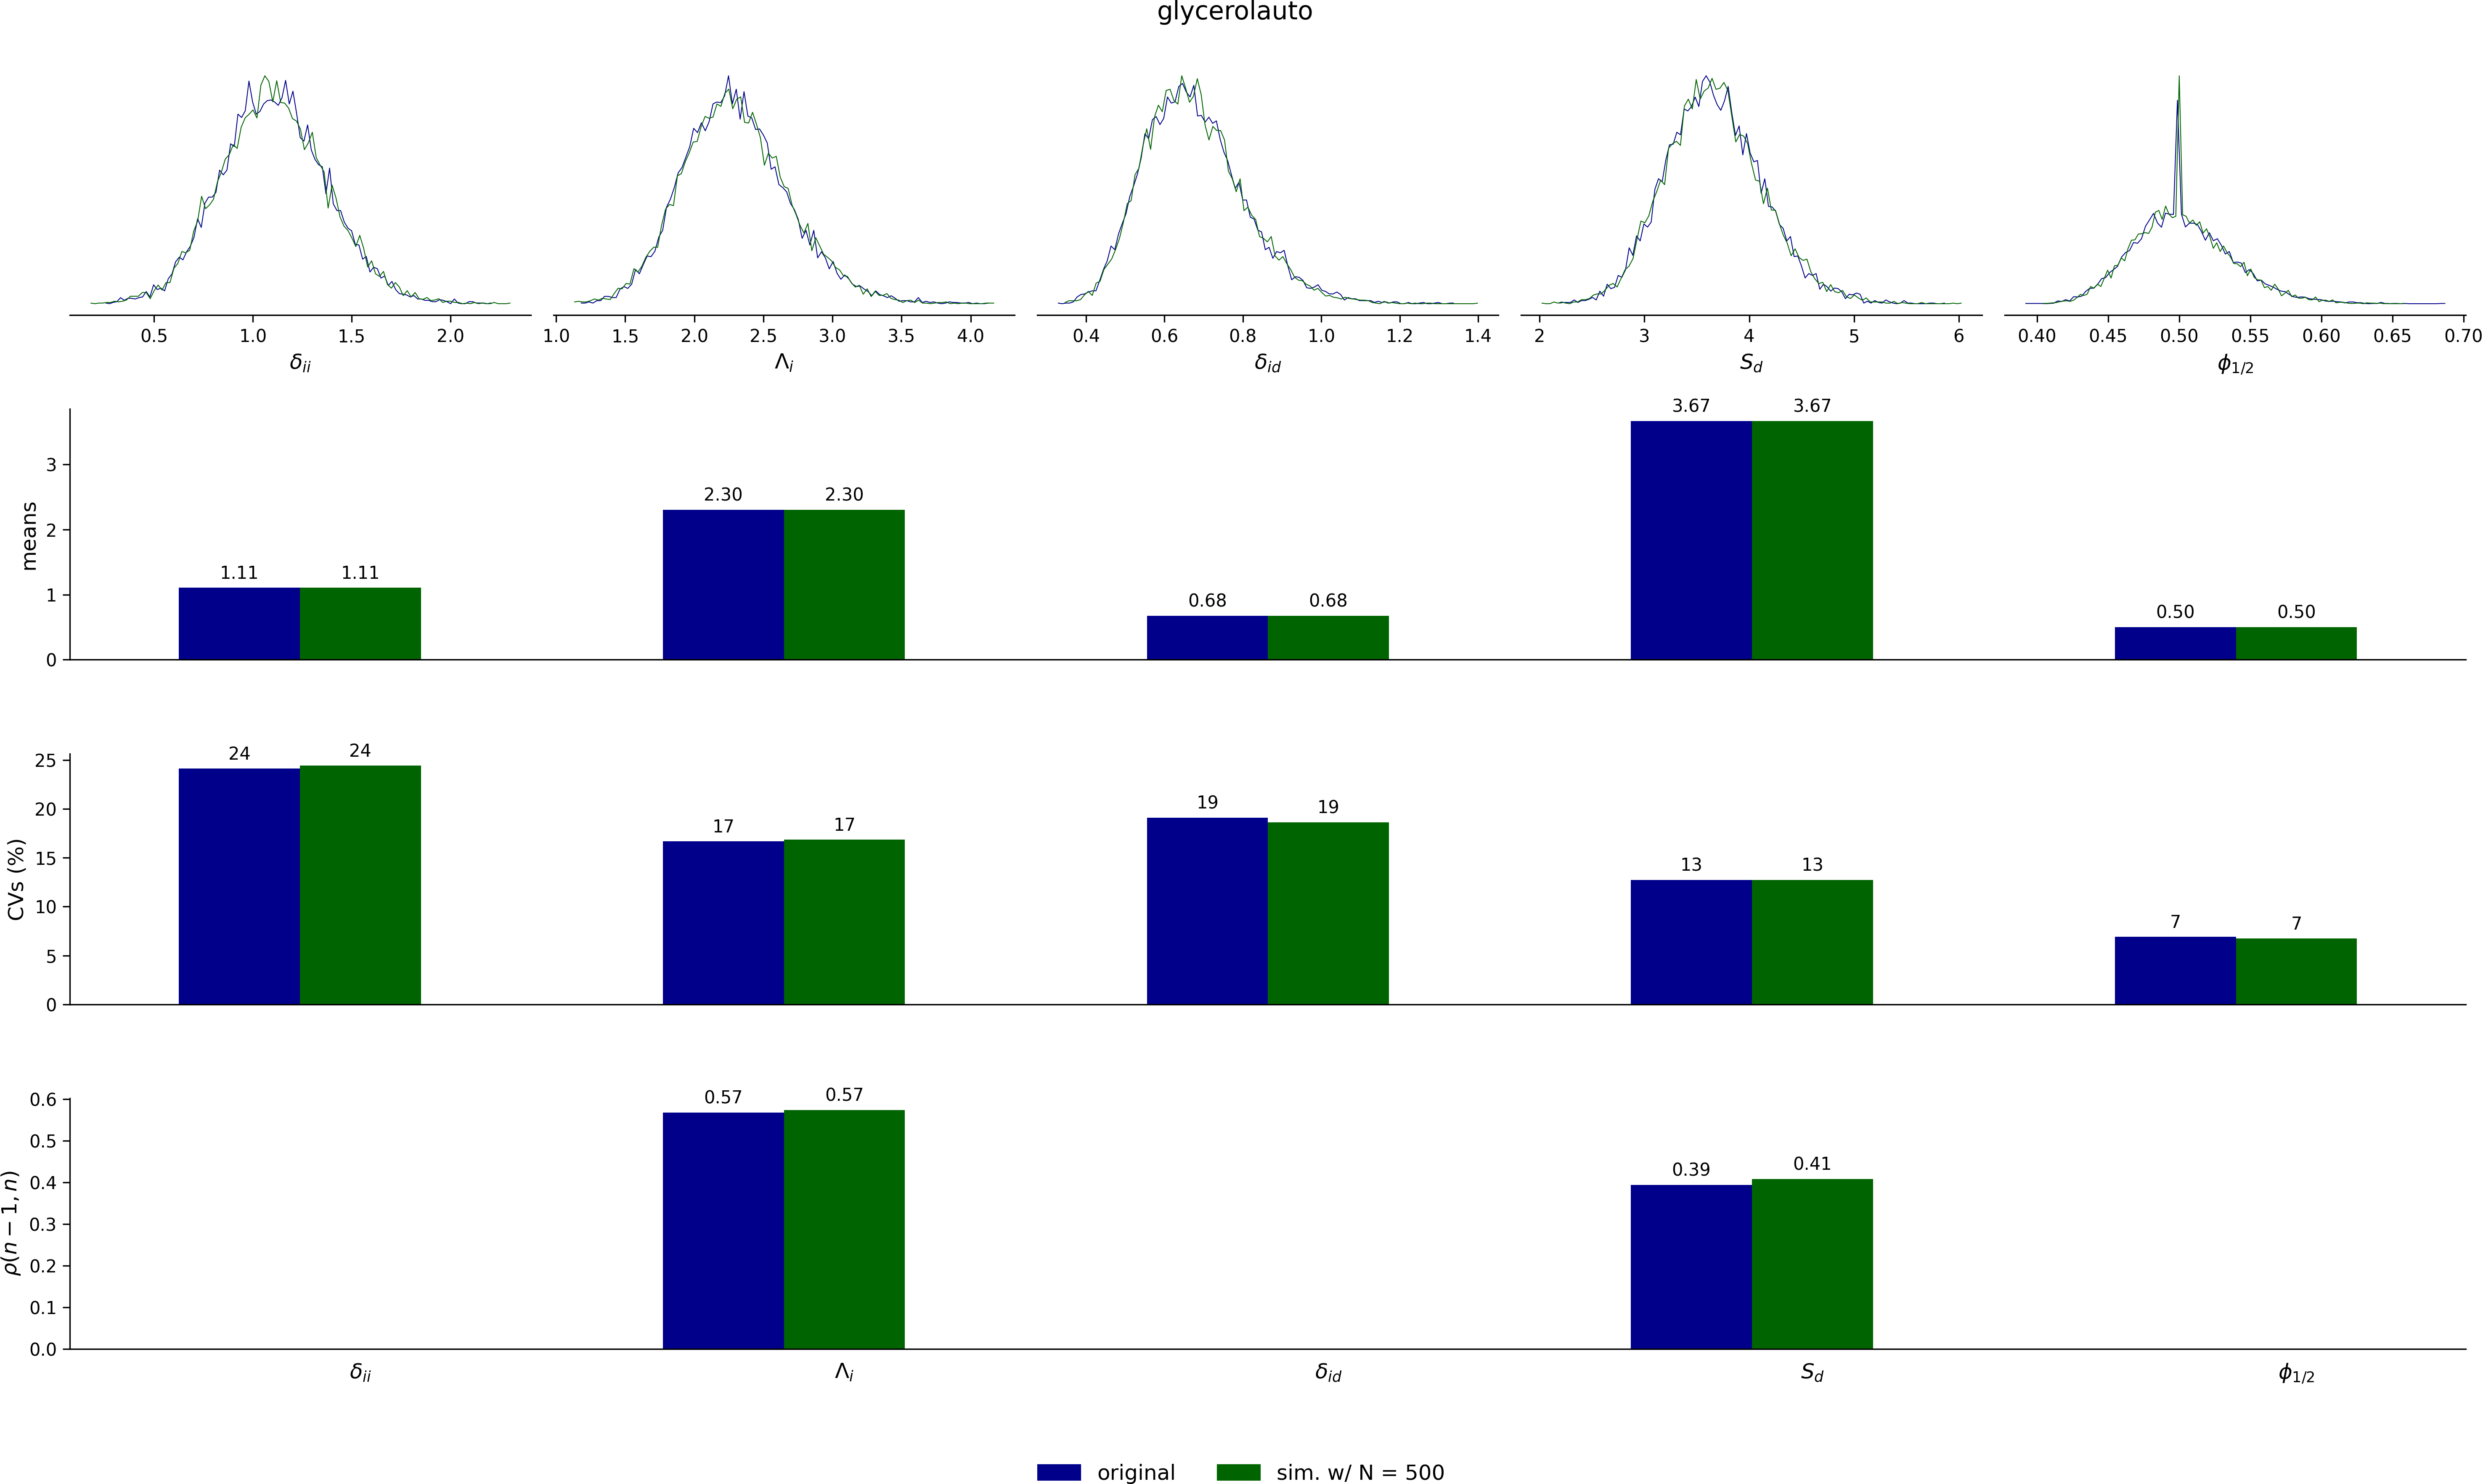

In [6]:
name = 'glycerolauto'
fpath = os.path.join(outputdir,"{:s}_{:s}{:s}".format(figname_base,name,'.png'))
# display one of the previous figures
Image(filename=fpath) 

As can be seen, simulations executed with $N=500$ initial cells reproduce the simulation files provided by the authors. As mentionned before, the intriguing peak in the distribution of the division ratio (1st row, 4th column) is also reproduced. This led us to do some additional analysis.

## A problem in the lineage creation

In the original simulation files provided by Witz et al., it seems that there was a problem in the assignment of the initial cells to the correct lineage. Let's consider the 'glycerolauto' condition as a starter, and load the corresponding data frame:

In [7]:
name = 'glycerolauto'
# load the data
key = '../DataSimulations/{:s}_standard.pkl'.format(name)
df = simu_dict[name][key]['df']

# show number of daughter cells to particular cell
cell_id = 1 # try 1,2..., 49
idx = df['mother_id'] == cell_id
ndaughters = np.sum(idx)
print("Cell #{:d} has {:d} daughters!".format(cell_id, ndaughters))
df.loc[idx,['mother_id', 'rfact']]

Cell #1 has 11 daughters!


,mother_id,rfact
10,1,0.500000
11,1,0.500000
12,1,0.500000
13,1,0.500000
14,1,0.500000
15,1,0.500000
16,1,0.500000
17,1,0.500000
18,1,0.500000
19,1,0.500000


In [8]:
# compute the number of daughers for all cells
get_ndaughters = lambda x, mydf: np.sum(mydf['mother_id'] == x.name)

# create new data frame
df_new = copy.deepcopy(df)
func = lambda x: get_ndaughters(x, df)
df_new['number_daughters'] = df_new.apply(func, axis=1)
print("Number of daughters found in this data:", df_new['number_daughters'].unique())

# remove cells with more than 2 daughters
idx = df_new['number_daughters'] > 2
df_new = df_new.loc[~idx]
print("Number of daughters after filtering:", df_new['number_daughters'].unique())

Number of daughters found in this data: [ 1 11  0]
Number of daughters after filtering: [1 0]


This analysis shows that the data provided had some bug because a cell should have either 2 daughters, 1 if only one is tracked, or none. We have removed cells with more than 2 daughters. Let's now revisit the previous correlation analysis.

In [9]:
# add the filtered data
newcolor='magenta'
mydict = simu_dict[name]
mydict['witz_filtered'] = {}
mydict['witz_filtered']['df'] = df_new
mydict['witz_filtered']['label'] = 'original filtered'
mydict['witz_filtered']['format'] = 'SIM'
mydict['witz_filtered']['color'] = newcolor

mydict = copy.deepcopy(simu_dict[name])

# delete some simulations
key = 'simulations/{:s}_standard_N500T2000.pkl'.format(name)
del mydict[key]

key = 'simulations/{:s}_standard_N5T200000.pkl'.format(name)
del mydict[key]

# draw the figure
## parameters
figname_base = 'simulations_comparison'
binw_dict = None
outputdir = os.path.join(fig_dir, 'figure5_analysis','after_filtering_original')

if not os.path.isdir(outputdir):
    os.makedirs(outputdir)

fig_title = name
fig = plot_simulation_overlays(mydict, bar_width=0.5, fig_title=fig_title, binw_dict=binw_dict)

figname = "{:s}_{:s}".format(figname_base, name)
fpath = os.path.join(outputdir, "{:s}".format(figname))
for ext in ext_list:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
    plt.close('all')

../DataSimulations/glycerolauto_standard.pkl
Cells with rfact = 0.5: 490 / 11185 <=> 4.38 %
witz_filtered
Cells with rfact = 0.5: 0 / 10646 <=> 0.00 %
Saved figure in figures/figure5_analysis/after_filtering_original/simulations_comparison_glycerolauto.png
Saved figure in figures/figure5_analysis/after_filtering_original/simulations_comparison_glycerolauto.svg


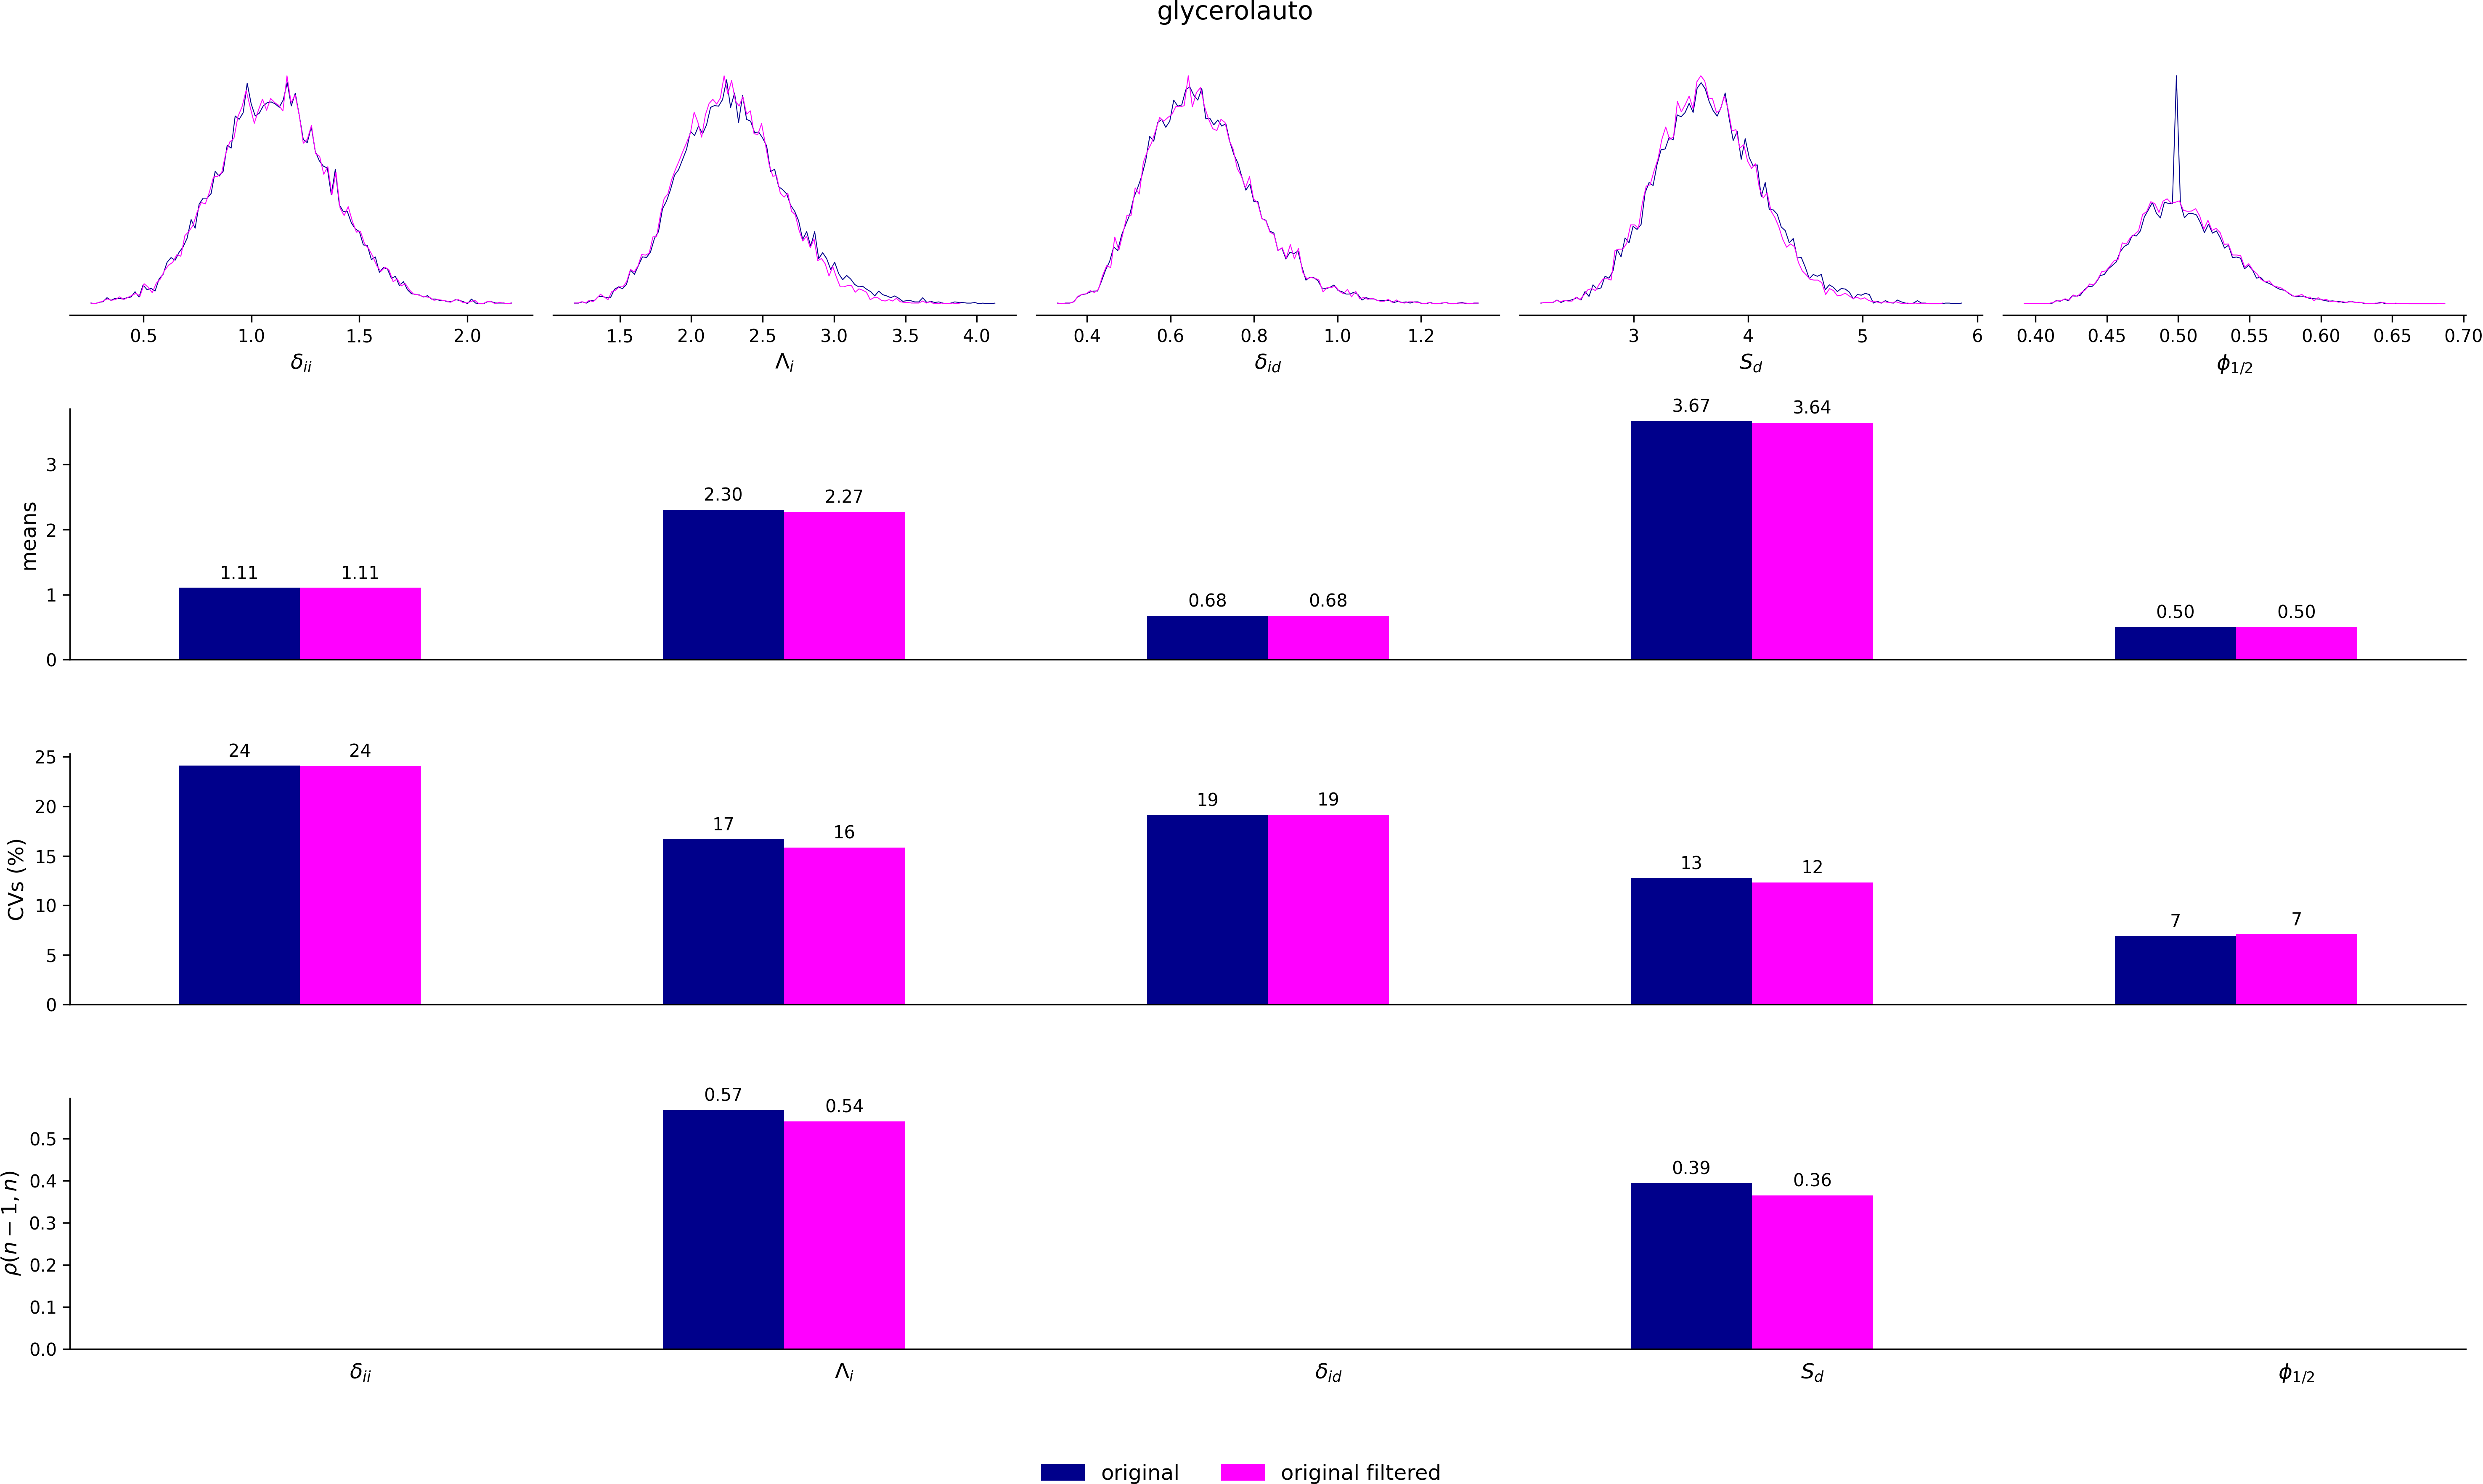

In [10]:
fpath = os.path.join(outputdir,"{:s}_{:s}{:s}".format(figname_base,name,'.png'))
# display one of the previous figures
Image(filename=fpath) 

As can be seen, filtering out cells with the lineage creation problem reduced the mother/daughter correlation coefficients. Also, as expected the peak in the distribution of the division ratio, caused by the initial cell with division ratio exactly equal to $1/2$ disappeared.

One can show that with these wrong mother/daughter couples, the autocorrelation is modified to
\begin{equation}
\hat{\rho} = (1-x) \rho + x,
\end{equation}
where $x$ is the fraction of mother/daughter couples which are in fact unrelated.

Although the decrease is moderate, that is a first step in our analysis. We generate below the same comparison for the rest of the growth conditions.

In [11]:
for name in names:
    mydict = simu_dict[name]
    
    # load the data
    key = '../DataSimulations/{:s}_standard.pkl'.format(name)
    df = mydict[key]['df']

    # remove cells with more than 2 daughters
    df_new = copy.deepcopy(df)
    func = lambda x: get_ndaughters(x, df)
    df_new['number_daughters'] = df_new.apply(func, axis=1)

    idx = df_new['number_daughters'] > 2
    df_new = df_new.loc[~idx]
    
    # add the filtered data
    newcolor = 'magenta'
    mydict['witz_filtered'] = {}
    mydict['witz_filtered']['df'] = df_new
    mydict['witz_filtered']['label'] = 'original filtered'
    mydict['witz_filtered']['format'] = 'SIM'
    mydict['witz_filtered']['color'] = newcolor
    
    mydict = copy.deepcopy(simu_dict[name])
    # delete some simulations
    key = 'simulations/{:s}_standard_N500T2000.pkl'.format(name)
    del mydict[key]

    key = 'simulations/{:s}_standard_N5T200000.pkl'.format(name)
    del mydict[key]
    
    # draw the figure
    fig_title = name
    fig = plot_simulation_overlays(mydict, bar_width=0.5, fig_title=fig_title, binw_dict=binw_dict)

    figname = "{:s}_{:s}".format(figname_base, name)
    fpath = os.path.join(outputdir, "{:s}".format(figname))
    for ext in ext_list:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
    #     fig.clf()
        plt.close('all')

../DataSimulations/glycerol_standard.pkl
Cells with rfact = 0.5: 490 / 10857 <=> 4.51 %
witz_filtered
Cells with rfact = 0.5: 0 / 10318 <=> 0.00 %
Saved figure in figures/figure5_analysis/after_filtering_original/simulations_comparison_glycerol.png
Saved figure in figures/figure5_analysis/after_filtering_original/simulations_comparison_glycerol.svg
../DataSimulations/glucose_standard.pkl
Cells with rfact = 0.5: 490 / 18426 <=> 2.66 %
witz_filtered
Cells with rfact = 0.5: 0 / 17887 <=> 0.00 %
Saved figure in figures/figure5_analysis/after_filtering_original/simulations_comparison_glucose.png
Saved figure in figures/figure5_analysis/after_filtering_original/simulations_comparison_glucose.svg
../DataSimulations/glucose8aa_standard.pkl
Cells with rfact = 0.5: 490 / 23862 <=> 2.05 %
witz_filtered
Cells with rfact = 0.5: 0 / 23323 <=> 0.00 %
Saved figure in figures/figure5_analysis/after_filtering_original/simulations_comparison_glucose8aa.png
Saved figure in figures/figure5_analysis/after_f

## Adder plot with "fixed" simulations

In the implementation by Witz and colleagues, to each cell is associated a lineage sequence, say '1BBB'. This means that the current cell results from 3 divisions from the initial cell with index 1 ('B' stands for keeping the bottom cell). Such a cell would therefore corresponds to the grand-grand daughter of cell number 1, or equivalently, it is generation 4 in the lineage originating from cell 1. In the file [coli_simulation.py](../colicycle/colicycle/coli_simulation.py), in the method `standardise_dataframe`, the mother cell index is constructed from such sequences. In this example, the mother cell is found by looking for the cell with the lineage sequence '1BB': it is the previous sequence minus the last character.

This method to construct lineages is perfectly valid in the previous scenario. However, let's now consider the case with 500 initial cells. The mother cell of cell '10B' will be found to be '10', which is correct. Yet by repeating the same operation, one erroneously concludes that cell '1' is the ancestor of cell '10'. This is exactly the caveat the simulations provided by Witz and colleagues are suffering from. Concretely, cells '1' has now cells '10' to '19' as daughter cells, in addition to cell '2'. Therefore we obtain the wrong result that cell '1' has 11 daughters. This applies to cells '20' to '29', '300' to '309', etc... Fortunately, as long as the number of initial cells $N<10$, this problem doesn't arise. We therefore don't need to modify the code of Witz and colleagues, and simply choose $N=5$ instead of $N=500$. 

We now proceed to re-analyze Figure 5A, displaying the agreement of the model with experimental data. In order to do so, we need to introduce new notations:
\begin{equation}
\left \lbrace
\begin{array}{lcl}
r &=& \rho \left(S_d^{(n-1)}, S_d^{(n)} \right), \\
\alpha &=& \rho \left(2 S_b^{(n)}, S_d^{(n)} \right).
\end{array}
\right .
\end{equation}

In the case where cells divide symmetrically, $S_d^{(n-1)} = 2 S_b^{(n)}$ and $r = \alpha$. The two quantities are therefore identical. However, when there are fluctuations in the division ratio, in general $r \neq \alpha$. For example, in the analysis of the previous paragraphs, the values reported correspond to $r$. However, for each data set, although thhe values of $r$ showed differences after filtering out cells with more than 2 daughters, the values of $\alpha$ were quasi identical (not shown), obscuring the actual difference between the simulations. Since we are now focusing on Figure 5A, i.e. plotting $S_b$ versus $S_d-S_b$, we will report both values.



In [12]:
# load the experimental data
## parameters
mapping_dict = {'glycerol': '20180706_GW296_glycerol37_1_MMStack', \
             'glucose': '20180711_GW296_glucose37_1_MMStack', \
             'glucose8aa': '20180709_GW296_glucose8aa37_1_MMStack', \
             'glycerolauto': '20170327_GW339_temp' \
            }
size_columns = ['length', 'Lb', 'Lb_fit', 'Ld_fit', 'Ld', 'Li', 'Li_fit', 'DLi', 'Li_old']
size_scale = 0.065 # nm/px

## loop
for name in names:
    exp_dir = os.path.join('..','PreProcessed', mapping_dict[name])
    exp_file = os.path.join(exp_dir, 'colidata.pkl')
    df = pd.read_pickle(exp_file)
    
    func = lambda x: x*size_scale
    df[size_columns] = df[size_columns].apply(func)

    simu_dict[name]['exp'] = {}
    mydict = simu_dict[name]['exp']
    mydict['df'] = df
    mydict['label'] = 'experimental data'
    mydict['format'] = 'EXP'
    mydict['color'] = 'orange'

In [13]:
# parameters
figname_base = 'adder_plot'
outputdir = os.path.join(fig_dir, 'figure5_analysis','adder_plot')

if not os.path.isdir(outputdir):
    os.makedirs(outputdir)

npred = 0

# makeing figures
for name in names:
    mydict = copy.deepcopy(simu_dict[name])
    
    # remove some simulations
    key = 'simulations/{:s}_standard_N500T2000.pkl'.format(name)
    del mydict[key]
    
    # set the bin size
    for key in mydict.keys():
        mydict[key]['binw_Lb'] = 0.1
        mydict[key]['binw_Ld'] = 0.1
    
    # draw the figure
    fig_title = name
    fig = plot_adder_compare(mydict, fig_title=fig_title, lw=0.5, npred=npred)

    figname = "{:s}_{:s}".format(figname_base, name)
    fpath = os.path.join(outputdir, "{:s}".format(figname))
    for ext in ext_list:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
    #     fig.clf()
        plt.close('all')

Plotting predictions with statistics computed from ../DataSimulations/glycerol_standard.pkl
Saved figure in figures/figure5_analysis/adder_plot/adder_plot_glycerol.png
Saved figure in figures/figure5_analysis/adder_plot/adder_plot_glycerol.svg
Plotting predictions with statistics computed from ../DataSimulations/glucose_standard.pkl
Saved figure in figures/figure5_analysis/adder_plot/adder_plot_glucose.png
Saved figure in figures/figure5_analysis/adder_plot/adder_plot_glucose.svg
Plotting predictions with statistics computed from ../DataSimulations/glucose8aa_standard.pkl
Saved figure in figures/figure5_analysis/adder_plot/adder_plot_glucose8aa.png
Saved figure in figures/figure5_analysis/adder_plot/adder_plot_glucose8aa.svg
Plotting predictions with statistics computed from ../DataSimulations/glycerolauto_standard.pkl
Saved figure in figures/figure5_analysis/adder_plot/adder_plot_glycerolauto.png
Saved figure in figures/figure5_analysis/adder_plot/adder_plot_glycerolauto.svg


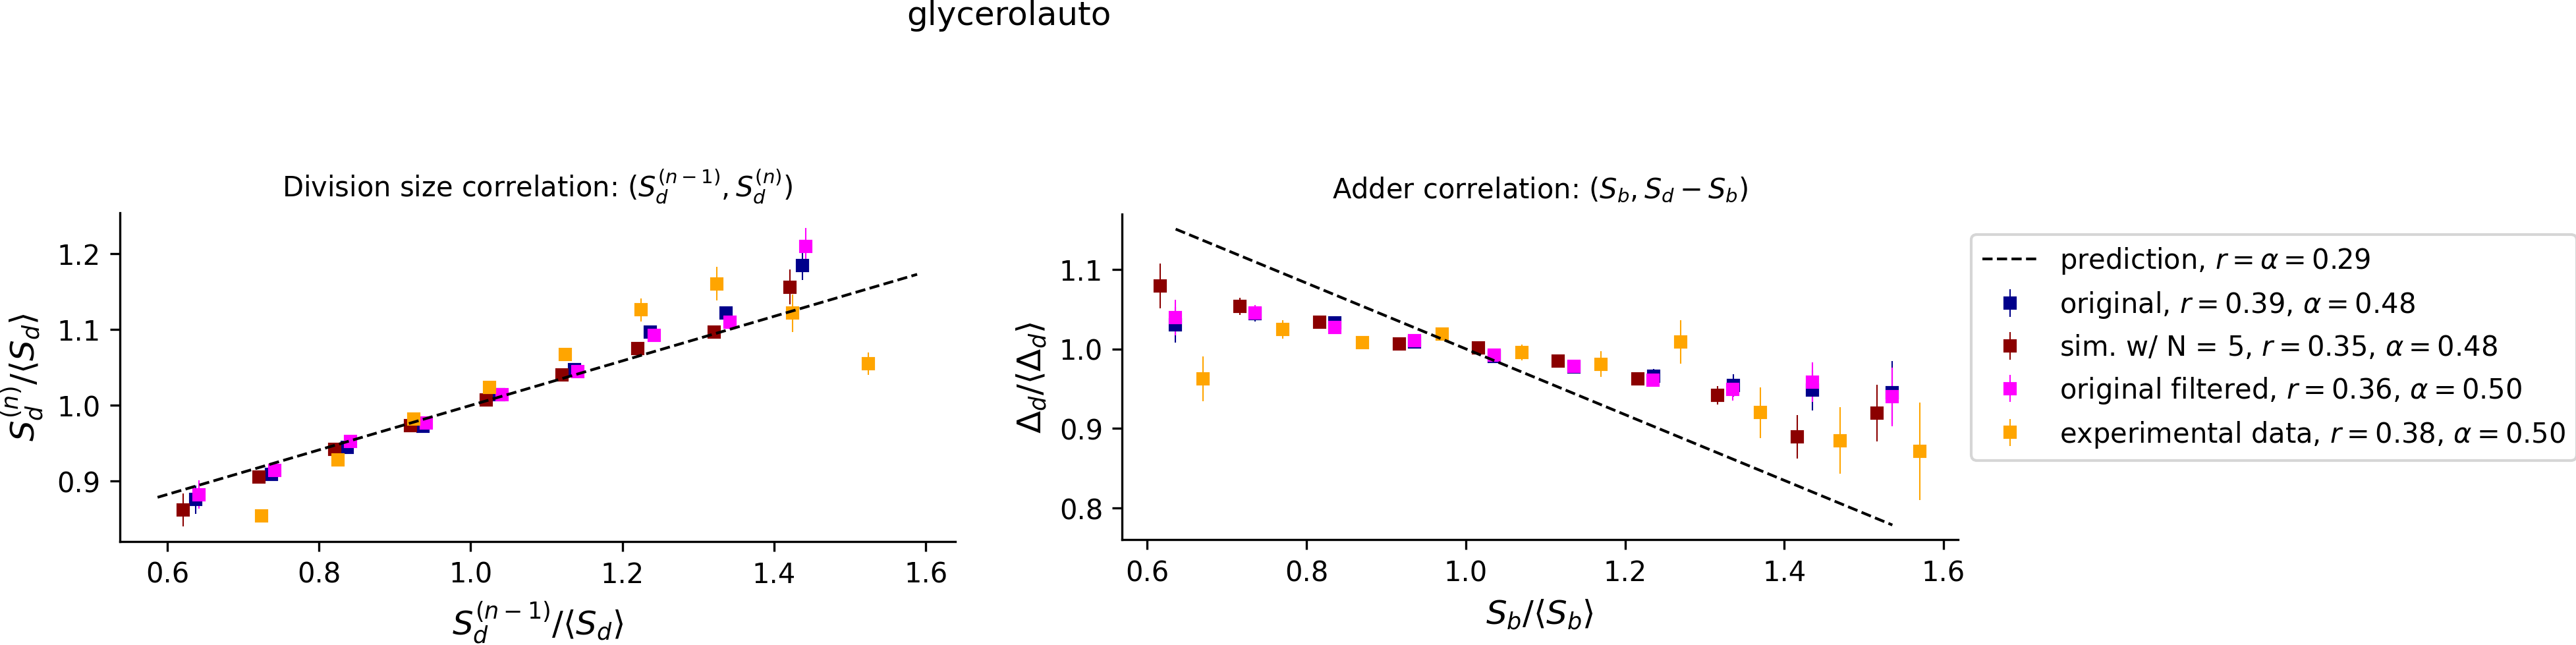

In [14]:
figname_base = 'adder_plot'
name = 'glycerolauto'
fpath = os.path.join(outputdir,"{:s}_{:s}{:s}".format(figname_base,name,'.png'))
# display one of the previous figures
Image(filename=fpath) 

Comparing the original simulation results provided by the authors and the "fixed" simulations with $N=5$, the following conclusions are obtained.

1. When looking at the mother/daughter correlation $(S_d^{(n-1)},S_d^{(n)})$ (left plot), it can be seen that the correlation coefficient is decreased. The slope of the binned average $\langle S_d^{(n)} | S_d^{(n-1)} \rangle$ decreases and is closer to the predicted value of $r$.
2. When looking at the adder plot, i.e. $\langle S_d | S_b \rangle$, the slope is also decreased slightly, but it remains away from the predicted value of $2 r - 1$.

In the next paragraph, we explain the origin of this misleading disagreement between analytical predictions and simulations.

## Results after resolution of the problem and comparison with predictions

In the previous paragraph, the autocorrelation obtained with simulation, although smaller than what reported in Figure 5A of Witz etc, still appears larger than the theoretical predictions. Here we show that removing fluctuations in the division ratio results in simulations to reproduce accurately the analytical predictions.

In [15]:
# parameters
figname_base = 'adder_plot'
outputdir = os.path.join(fig_dir, 'figure5_analysis','adder_plot_symmetrical_div')
newcolor = 'blue'

if not os.path.isdir(outputdir):
    os.makedirs(outputdir)

npred = 0
# makeing figures
for name in names:
    mydict = copy.deepcopy(simu_dict[name])
    
    # remove some simulations
    key = '../DataSimulations/{:s}_standard.pkl'.format(name)
    del mydict[key]
    
    key = 'simulations/{:s}_standard_N500T2000.pkl'.format(name)
    del mydict[key]
    
    key = 'witz_filtered'
    del mydict[key]
    
#     key = 'exp'
#     del mydict[key]
    
    # add simulations
    simu_type = 'symmetrical'
    fname = "{:s}_{:s}".format(name, simu_type)

    # load simulation with symmetrical division
    simu_suf = 'N5T200000'
    fpath_GLTFS = os.path.join(dir_simuGLTFS, "{:s}_{:s}".format(fname, simu_suf) + '.pkl')

    if os.path.isfile(fpath_GLTFS):
        mydict[fpath_GLTFS] = {}
        mydict[fpath_GLTFS]['df'] = pd.read_pickle(fpath_GLTFS)
        mydict[fpath_GLTFS]['format']='SIM'
        mydict[fpath_GLTFS]['label']='symm. div.'
        mydict[fpath_GLTFS]['color']=newcolor
    
    # set the bin size
    for key in mydict.keys():
        mydict[key]['binw_Lb'] = 0.1
        mydict[key]['binw_Ld'] = 0.1
        
    # draw the figure
    fig_title = name
    fig = plot_adder_compare(mydict, fig_title=fig_title, lw=0.5, npred=npred)

    figname = "{:s}_{:s}".format(figname_base, name)
    fpath = os.path.join(outputdir, "{:s}".format(figname))
    for ext in ext_list:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
    #     fig.clf()
        plt.close('all')

Plotting predictions with statistics computed from simulations/glycerol_standard_N5T200000.pkl
Saved figure in figures/figure5_analysis/adder_plot_symmetrical_div/adder_plot_glycerol.png
Saved figure in figures/figure5_analysis/adder_plot_symmetrical_div/adder_plot_glycerol.svg
Plotting predictions with statistics computed from simulations/glucose_standard_N5T200000.pkl
Saved figure in figures/figure5_analysis/adder_plot_symmetrical_div/adder_plot_glucose.png
Saved figure in figures/figure5_analysis/adder_plot_symmetrical_div/adder_plot_glucose.svg
Plotting predictions with statistics computed from simulations/glucose8aa_standard_N5T200000.pkl
Saved figure in figures/figure5_analysis/adder_plot_symmetrical_div/adder_plot_glucose8aa.png
Saved figure in figures/figure5_analysis/adder_plot_symmetrical_div/adder_plot_glucose8aa.svg
Plotting predictions with statistics computed from simulations/glycerolauto_standard_N5T200000.pkl
Saved figure in figures/figure5_analysis/adder_plot_symmetric

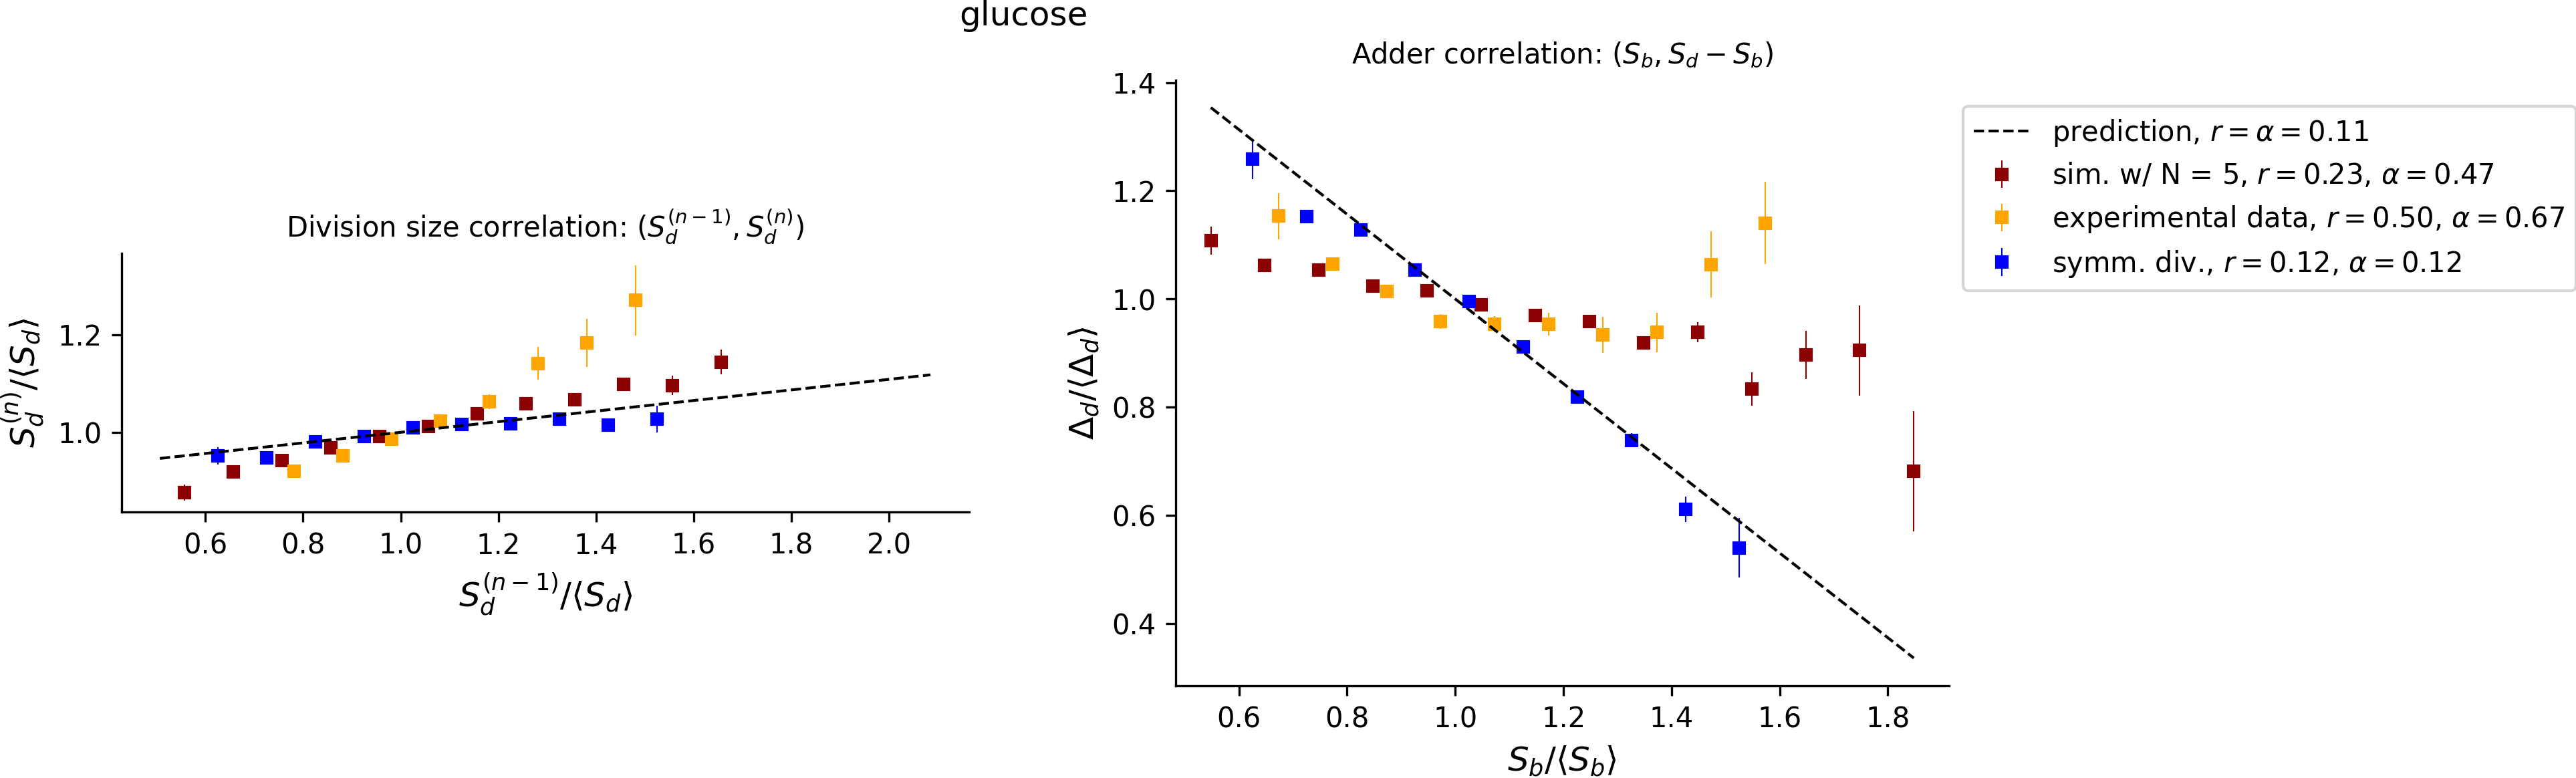

In [16]:
name = 'glucose'
fpath = os.path.join(outputdir,"{:s}_{:s}{:s}".format(figname_base,name,'.png'))
# display one of the previous figures
Image(filename=fpath) 

This demonstrates that once symmetrical division is restored, which is one of the two hypothesis from which the analytical results were derived, simulations agrees with predictions. In other words, the reported adder behavior of the model is due in this case to the significant noise in the division ratio. It is worth noting that the agreement is excellent, although $\delta_{id}$ is distributed as a log-normal stochastic variable. Using a normal variable instead would only improve the agreement with the theory.

## Comparison with experimental/simulation data from Si & Le Treut

We know provide the same analysis with simulations based on experimental data taken from Si & Le Treut (2019).

In [17]:
# Load the simulation files
## selection parameters
nice_colors = ['gold', 'red', 'blue', 'green', 'violet']
names = ['mg1655_acetate', \
         'mg1655_glucose', \
         'mg1655_glycerol11aa', \
         'ncm3722_arginine', \
         'ncm3722_glucose', \
         'ncm3722_glucose12aa' \
        ]
simu_suf = 'N5T200000'
patrn = 'N(\d+)T(\d+)'
simu_types = ['standard', 'symmetrical']
direxp = os.path.join('.','experiments')

simu_dict = {}
## loading loops
for name in names:
    print("Loading simulation results for condition: {:s}...".format(name))
    simu_dict[name] = {}
    sub_dict = simu_dict[name]

    color_iter = iter(nice_colors)

    # load experiment
    fpath = os.path.join(direxp, name,'colidata.pkl')
    color = next(color_iter)
    if os.path.isfile(fpath):
            sub_dict[fpath] = {}
            sub_dict[fpath]['df'] = pd.read_pickle(fpath)
            sub_dict[fpath]['format']='EXP2'
            sub_dict[fpath]['label']='experimental data'
            sub_dict[fpath]['color'] = color
    
    # load simulations
    for simu_type in simu_types:
        fname = "{:s}_{:s}_{:s}".format(name, simu_type,simu_suf)
        color = next(color_iter)
        
        # load simulation file
        fpath = os.path.join(dir_simuGLTFS, fname + '.pkl')
        if os.path.isfile(fpath):
            sub_dict[fpath] = {}
            sub_dict[fpath]['df'] = pd.read_pickle(fpath)
            sub_dict[fpath]['format']='SIM'
            sub_dict[fpath]['label']='sim. {:s}'.format(simu_type)
            sub_dict[fpath]['color'] = color

Loading simulation results for condition: mg1655_acetate...
Loading simulation results for condition: mg1655_glucose...
Loading simulation results for condition: mg1655_glycerol11aa...
Loading simulation results for condition: ncm3722_arginine...
Loading simulation results for condition: ncm3722_glucose...
Loading simulation results for condition: ncm3722_glucose12aa...


### Plot agreement with size parameters

In [18]:
# make the plots and save them
## parameters
figname_base = 'simulations_comparison'
binw_dict = {'Lambda_i': 0.1, 'rfact': 0.01}
# binw_dict = None
outputdir = os.path.join(fig_dir, 'figure5_analysis','fsgltdata')

if not os.path.isdir(outputdir):
    os.makedirs(outputdir)

## loop
for i in range(len(names)):
    name = names[i]
    fig_title = name
    
    mydict = copy.deepcopy(simu_dict[name])
    
    fig = plot_simulation_overlays(mydict, bar_width=0.5, fig_title=fig_title, binw_dict=binw_dict)

    figname = "{:s}_{:s}".format(figname_base,name)
    fpath = os.path.join(outputdir, "{:s}".format(figname))
    for ext in ext_list:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
#     fig.clf()
    plt.close('all')

./experiments/mg1655_acetate/colidata.pkl
Cells with rfact = 0.5: 11 / 680 <=> 1.62 %
simulations/mg1655_acetate_standard_N5T200000.pkl
Cells with rfact = 0.5: 0 / 5065 <=> 0.00 %
simulations/mg1655_acetate_symmetrical_N5T200000.pkl
Cells with rfact = 0.5: 5040 / 5040 <=> 100.00 %
Saved figure in figures/figure5_analysis/fsgltdata/simulations_comparison_mg1655_acetate.png
Saved figure in figures/figure5_analysis/fsgltdata/simulations_comparison_mg1655_acetate.svg
./experiments/mg1655_glucose/colidata.pkl
Cells with rfact = 0.5: 18 / 1482 <=> 1.21 %
simulations/mg1655_glucose_standard_N5T200000.pkl
Cells with rfact = 0.5: 0 / 18215 <=> 0.00 %
simulations/mg1655_glucose_symmetrical_N5T200000.pkl
Cells with rfact = 0.5: 18123 / 18123 <=> 100.00 %
Saved figure in figures/figure5_analysis/fsgltdata/simulations_comparison_mg1655_glucose.png
Saved figure in figures/figure5_analysis/fsgltdata/simulations_comparison_mg1655_glucose.svg
./experiments/mg1655_glycerol11aa/colidata.pkl
Cells with rf

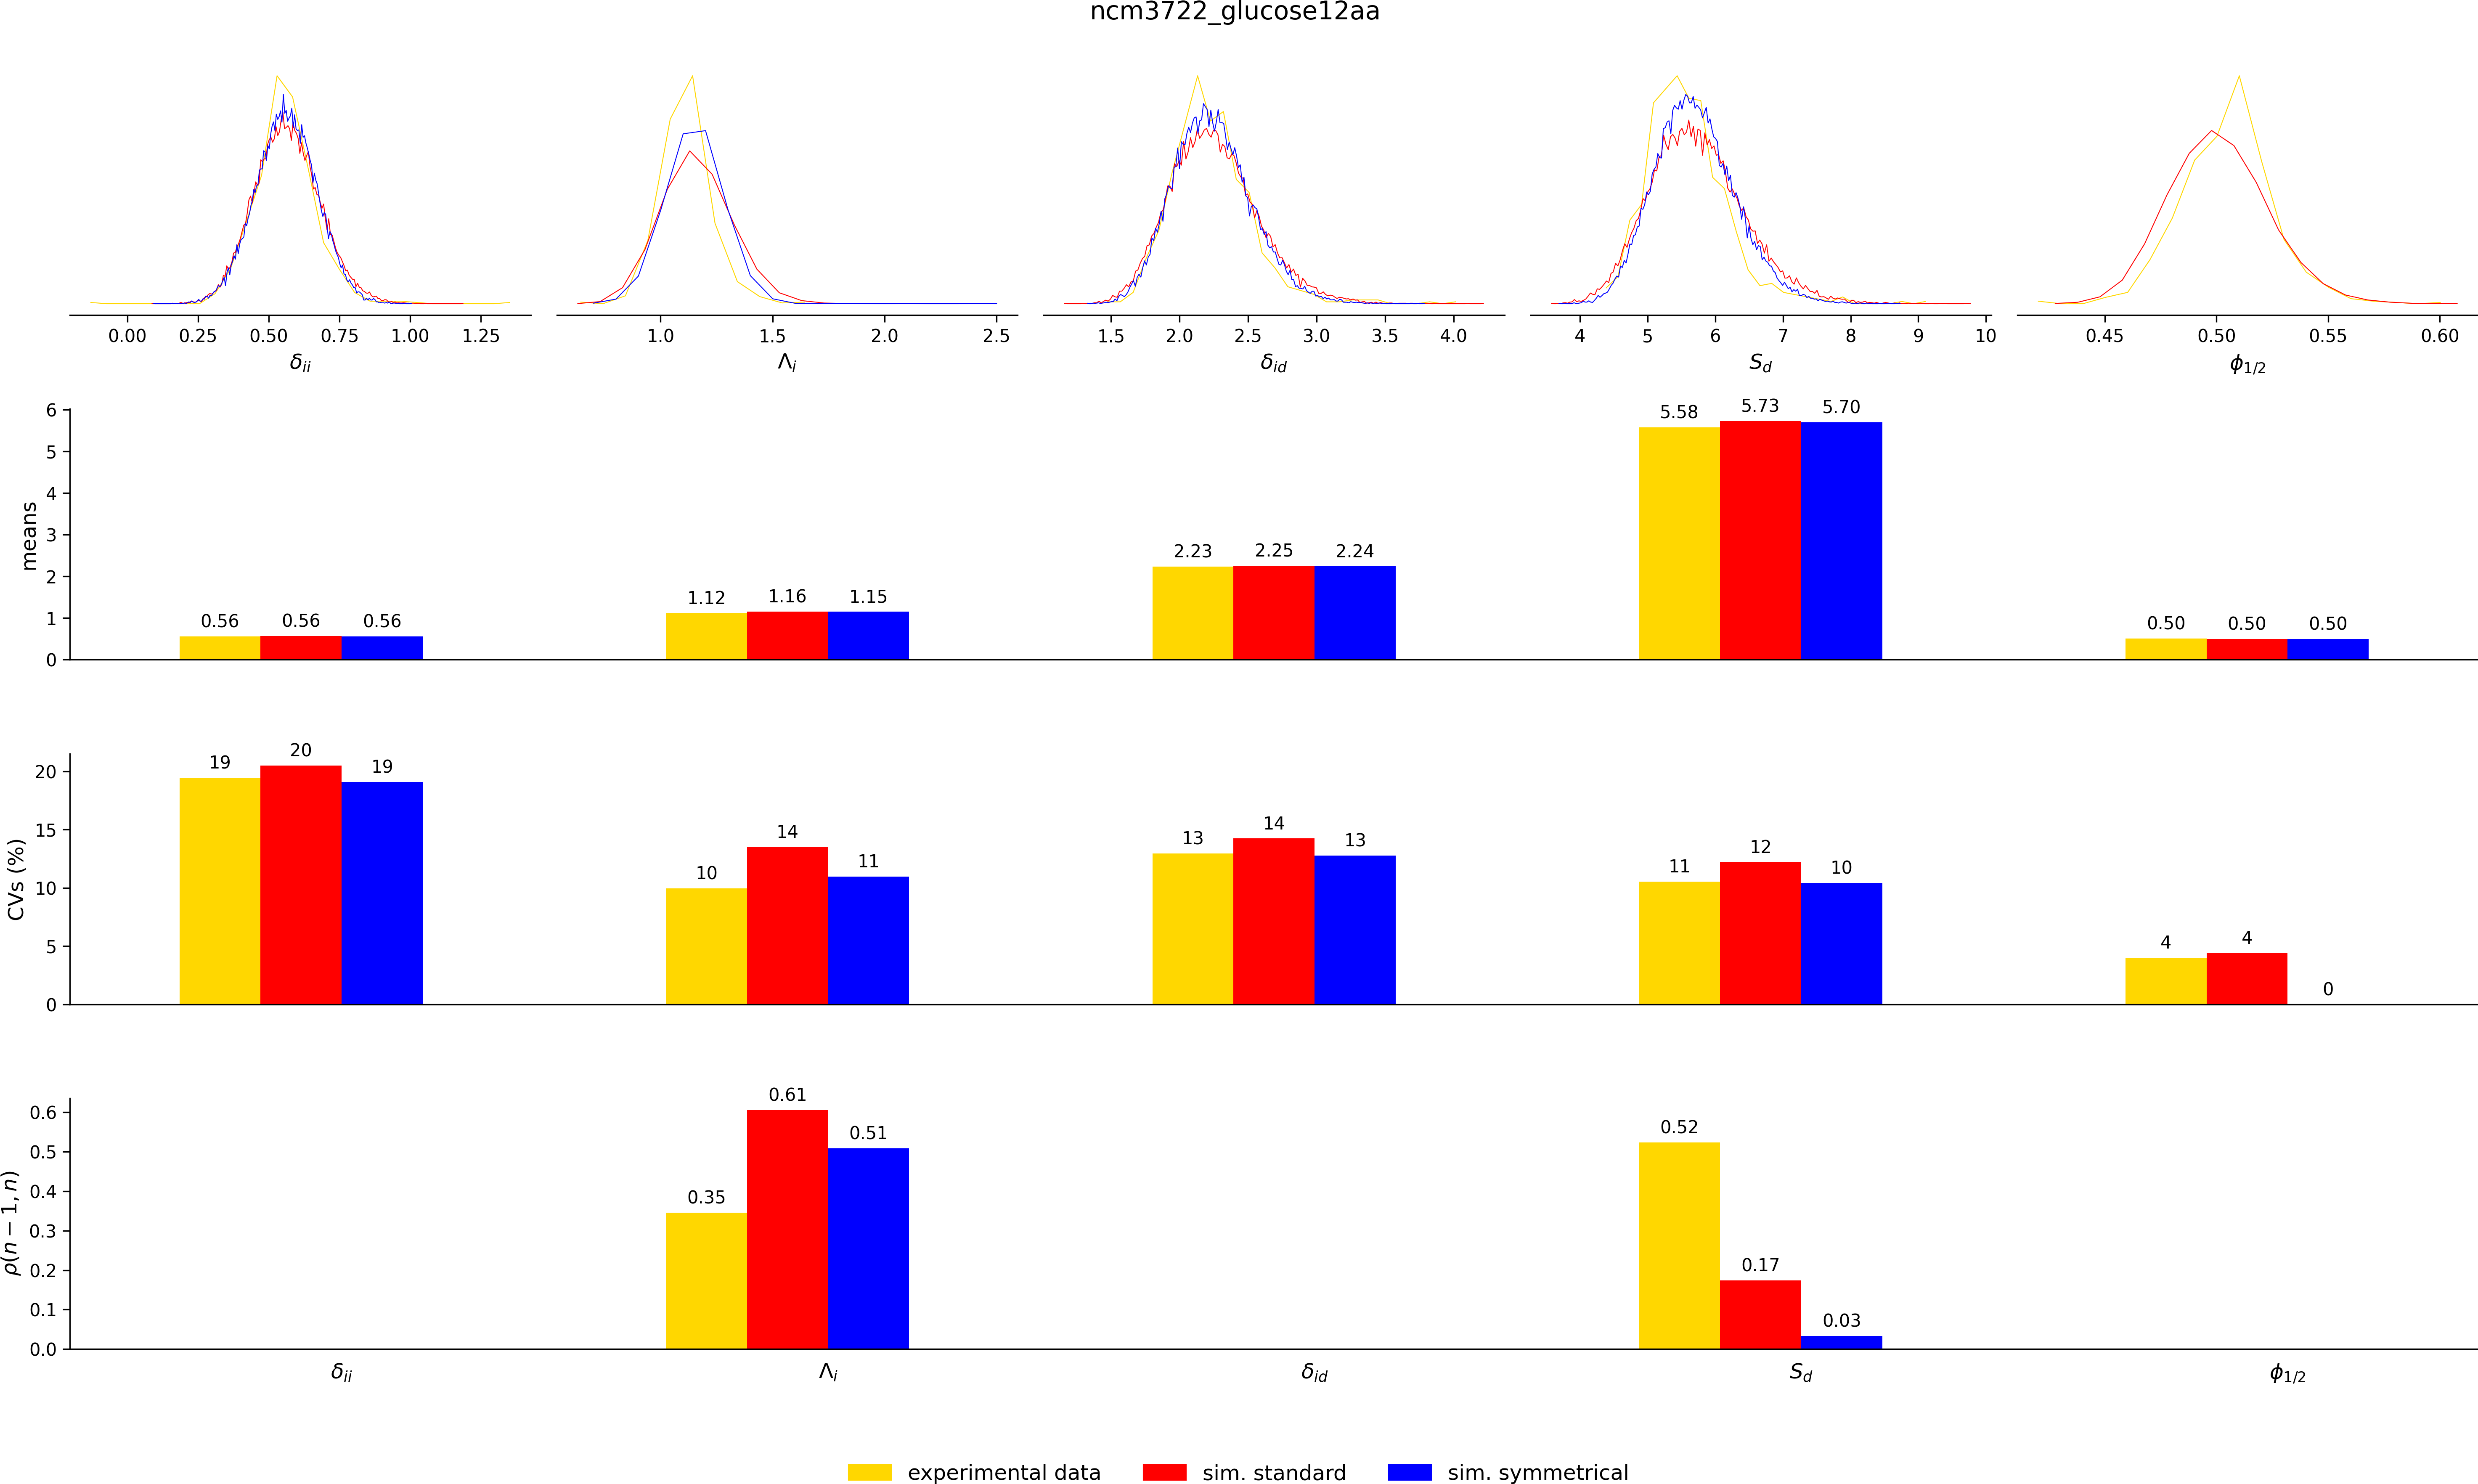

In [19]:
name = 'ncm3722_glucose12aa'
fpath = os.path.join(outputdir,"{:s}_{:s}{:s}".format(figname_base,name,'.png'))
# display one of the previous figures
Image(filename=fpath) 

The previous figure illustrates that the simulations have been parametrized properly so as to reproduce the experimental distributions. We note that in some growth conditions, the distributions of the division ratio $\phi_{1/2}$ between experimental data and simulations do not agree well. To explain this, we note that Witz and colleagues chose to draw the division ratio as $\phi_{1/2} = 1/(1 + X)$ in their simulations, where $X$ is a normal stochastic variable with mean 1 and variance taken from the experimental data. We have checked that the distributions of $X = (1-\phi_{1/2})/\phi_{1/2}$ do agree with each other for experiments and simulations. So it means instead that for our experimental data, septum positioning is not well described by the functional form chosen by Witz and colleagues.

### Repeat adder analysis

In [20]:
# parameters
figname_base = 'adder_plot'
outputdir = os.path.join(fig_dir, 'figure5_analysis','adder_plot_fsgltdata')

if not os.path.isdir(outputdir):
    os.makedirs(outputdir)

npred = 0
# makeing figures
for name in names:
    mydict = copy.deepcopy(simu_dict[name])
    
    # set the bin size
    for key in mydict.keys():
        mydict[key]['binw_Lb'] = 0.05
        mydict[key]['binw_Ld'] = 0.05
        
    # draw the figure
    fig_title = name
    fig = plot_adder_compare(mydict, fig_title=fig_title, lw=0.5, npred=npred)

    figname = "{:s}_{:s}".format(figname_base, name)
    fpath = os.path.join(outputdir, "{:s}".format(figname))
    for ext in ext_list:
        fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
        print("Saved figure in {:s}".format(fpath+ext))
    #     fig.clf()
        plt.close('all')

Plotting predictions with statistics computed from ./experiments/mg1655_acetate/colidata.pkl
Saved figure in figures/figure5_analysis/adder_plot_fsgltdata/adder_plot_mg1655_acetate.png
Saved figure in figures/figure5_analysis/adder_plot_fsgltdata/adder_plot_mg1655_acetate.svg
Plotting predictions with statistics computed from ./experiments/mg1655_glucose/colidata.pkl
Saved figure in figures/figure5_analysis/adder_plot_fsgltdata/adder_plot_mg1655_glucose.png
Saved figure in figures/figure5_analysis/adder_plot_fsgltdata/adder_plot_mg1655_glucose.svg
Plotting predictions with statistics computed from ./experiments/mg1655_glycerol11aa/colidata.pkl
Saved figure in figures/figure5_analysis/adder_plot_fsgltdata/adder_plot_mg1655_glycerol11aa.png
Saved figure in figures/figure5_analysis/adder_plot_fsgltdata/adder_plot_mg1655_glycerol11aa.svg
Plotting predictions with statistics computed from ./experiments/ncm3722_arginine/colidata.pkl
Saved figure in figures/figure5_analysis/adder_plot_fsgltda

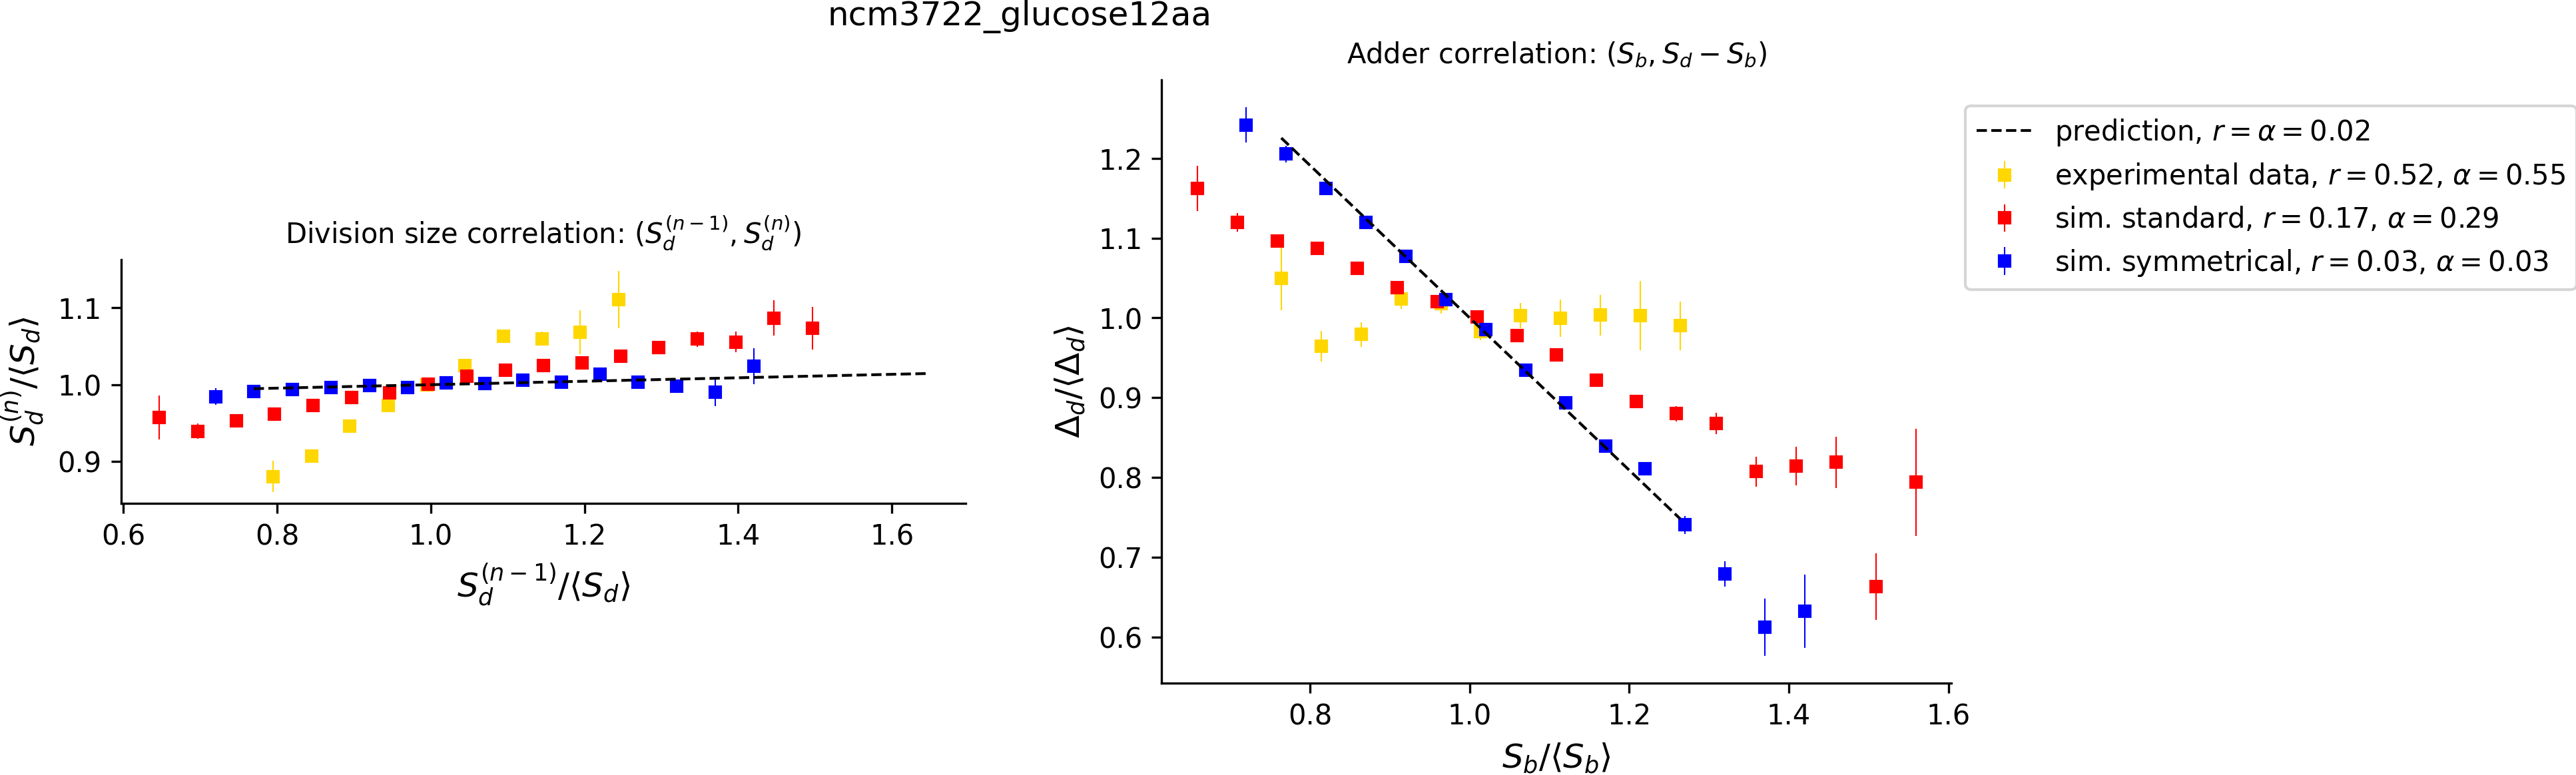

In [21]:
# strong disagreement experiment vs simulation
name = 'ncm3722_glucose12aa'
fpath = os.path.join(outputdir,"{:s}_{:s}{:s}".format(figname_base,name,'.png'))
# display one of the previous figures
Image(filename=fpath) 

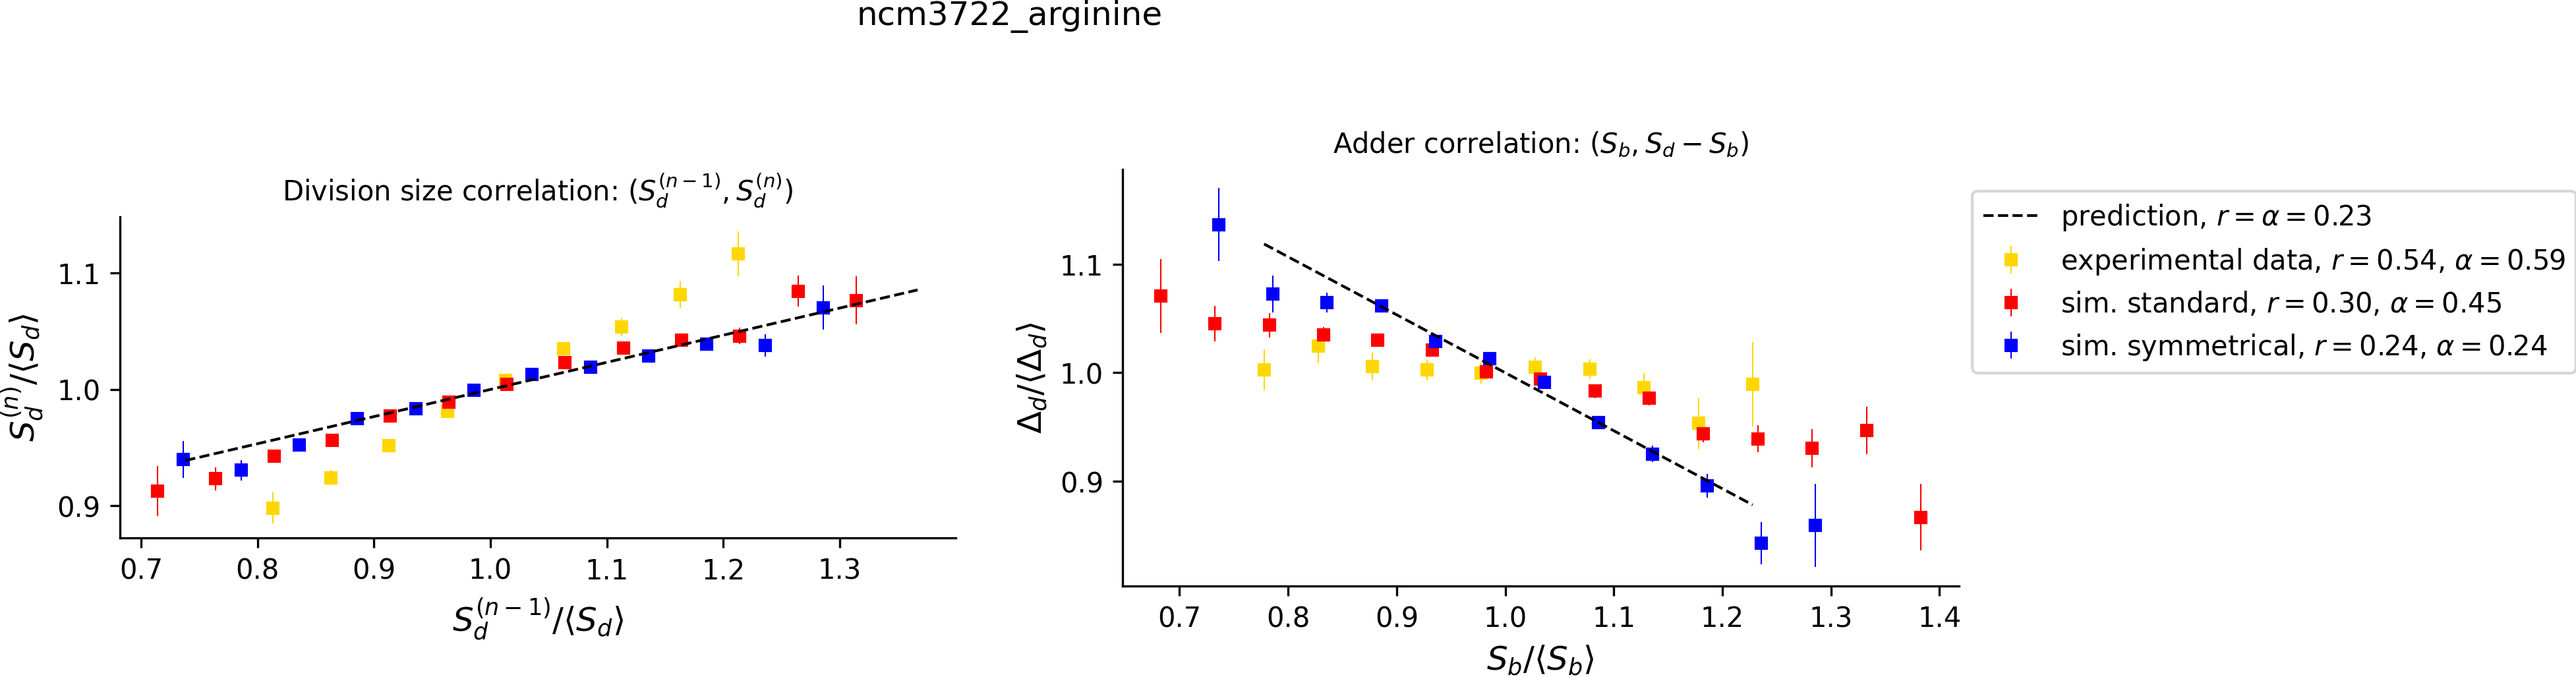

In [22]:
# little disagreement experiment vs simulation
name = 'ncm3722_arginine'
fpath = os.path.join(outputdir,"{:s}_{:s}{:s}".format(figname_base,name,'.png'))
# display one of the previous figures
Image(filename=fpath) 

Overall, the same analysis applied to our experimenta data suggests that the model put forward by Witz and colleagues fails to systematically reproduces the experimental size homeostasis behavior. In particular, the simuations tend to predict a more "sizer" behavior.